In [1]:
!pip install pandas_datareader==0.10.0

     |████████████████████████████████| 109 kB 20.7 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
start = '2004-08-18'
end = 'today'   # se cambio esto '2022-01-20'

df = data.DataReader('GOOG', 'yahoo', start, end)

df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4393 entries, 2004-08-19 to 2022-01-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       4393 non-null   float64
 1   Low        4393 non-null   float64
 2   Open       4393 non-null   float64
 3   Close      4393 non-null   float64
 4   Volume     4393 non-null   float64
 5   Adj Close  4393 non-null   float64
dtypes: float64(6)
memory usage: 240.2 KB


In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-24,2615.570068,2492.839111,2520.550049,2607.439941,2764600.0,2607.439941
2022-01-25,2586.770020,2527.560059,2568.709961,2534.709961,1800400.0,2534.709961
2022-01-26,2656.149902,2543.070068,2611.850098,2584.800049,1979400.0,2584.800049
2022-01-27,2652.198975,2578.899902,2627.219971,2582.419922,1512400.0,2582.419922
2022-01-28,2667.409912,2573.889893,2600.000000,2665.790039,1525878.0,2665.790039


In [6]:
#df = df.reset_index()
#df.head()

In [7]:
df = df.drop(['Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
Date,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0


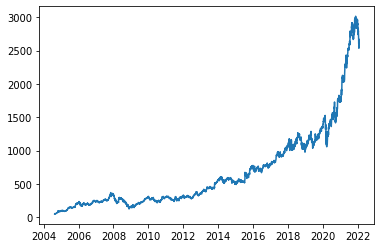

In [8]:
plt.plot(df.Close)

In [9]:
df

,High,Low,Open,Close,Volume
Date,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0
...,...,...,...,...,...
2022-01-24,2615.570068,2492.839111,2520.550049,2607.439941,2764600.0
2022-01-25,2586.770020,2527.560059,2568.709961,2534.709961,1800400.0
2022-01-26,2656.149902,2543.070068,2611.850098,2584.800049,1979400.0


In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

Date
2004-08-19            NaN
2004-08-20            NaN
2004-08-23            NaN
2004-08-24            NaN
2004-08-25            NaN
                 ...     
2022-01-24    2859.228411
2022-01-25    2855.407109
2022-01-26    2852.411311
2022-01-27    2849.280510
2022-01-28    2846.834612
Name: Close, Length: 4393, dtype: float64

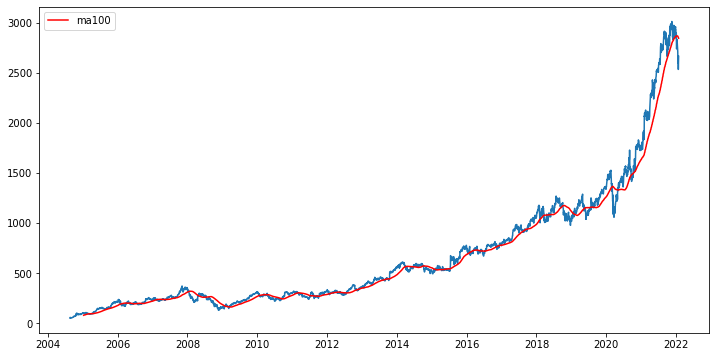

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r', label='ma100')
plt.legend()
plt.show()
#plt.plot(y_test, 'b', label = 'Precio Original')
#plt.plot(y_predicted, 'r', label= 'Precio Predecido')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

Date
2004-08-19            NaN
2004-08-20            NaN
2004-08-23            NaN
2004-08-24            NaN
2004-08-25            NaN
                 ...     
2022-01-24    2697.932555
2022-01-25    2699.332155
2022-01-26    2700.919805
2022-01-27    2702.557704
2022-01-28    2704.403354
Name: Close, Length: 4393, dtype: float64

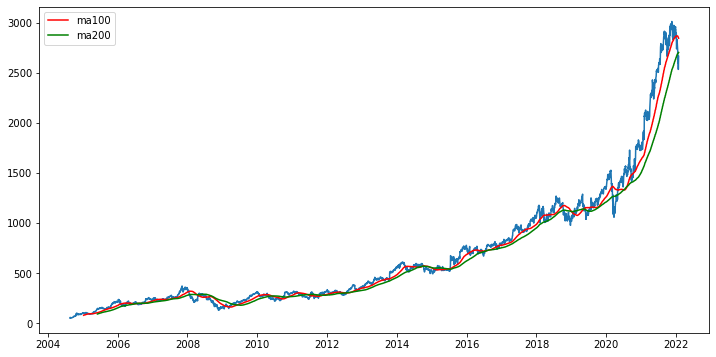

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r', label='ma100')
plt.plot(ma200,'g', label='ma200')
plt.legend()
plt.show()

In [14]:
df.shape


(4393, 5)

In [15]:
# Cree un nuevo marco de datos con solo la columna 'Close'
data = df.filter(['Close'])

# Convierte el marco de datos en una matriz numpy
dataset = data.values

# Obtenga el número de filas para entrenar el modelo
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

4174

In [16]:
# Escalando la data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[5.54543500e-05],
       [1.39473616e-03],
       [1.57790036e-03],
       ...,
       [8.55152666e-01],
       [8.54349753e-01],
       [8.82473891e-01]])

In [17]:
 
#Creamos el entrenamiento de la data
# Crear el conjunto de datos de entrenamiento escalado

train_data = scaled_data[0:int(training_data_len), :]
# Divida los datos en conjuntos de datos x_train y y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convierte x_train y y_train en matrices numpy
x_train, y_train = np.array(x_train), np.array(y_train)

# Reformamos los datos
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([5.54543500e-05, 1.39473616e-03, 1.57790036e-03, 8.16678000e-04,
       1.00656343e-03, 1.32751998e-03, 1.03176902e-03, 3.36080925e-04,
       3.96575878e-04, 4.03299684e-05, 2.52061016e-04, 0.00000000e+00,
       2.63824138e-04, 3.84812756e-04, 3.86493386e-04, 8.93975390e-04,
       1.25862445e-03, 1.92910567e-03, 2.01480621e-03, 2.34584653e-03,
       2.93734845e-03, 3.25158504e-03, 2.99616277e-03, 3.08690520e-03,
       3.49692354e-03, 3.33056307e-03, 3.06674021e-03, 4.51188884e-03,
       5.22101940e-03, 4.97231964e-03, 5.47308041e-03, 5.88981999e-03,
       6.44603382e-03, 6.22926346e-03, 6.52669376e-03, 6.33848896e-03,
       5.92343001e-03, 6.28303589e-03, 6.87117655e-03, 7.05602267e-03,
       7.41058666e-03, 8.25919148e-03, 8.05418295e-03, 6.80228102e-03,
       8.29616019e-03, 1.21694946e-02, 1.46850603e-02, 1.37440337e-02,
       1.44447637e-02, 1.56765007e-02, 1.52295123e-02, 1.61352508e-02,
       1.59403235e-02, 1.54025940e-02, 1.42313520e-02, 1.16519301e-02,
     

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Contruimos el modelo LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compilamos el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamos el modelo
model.fit(x_train, y_train, batch_size=1, epochs=1)

4114/4114 [==============================] - 152s 36ms/step - loss: 5.4932e-04


In [19]:
model.save('keras_model.h5')

In [20]:
# Creamos la data de prueba

test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Conviertimos los datos en una matriz numpy
x_test = np.array(x_test)

# Reformamos la data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Obtenemos los valores de precios predichos de los modelos
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Obtenemos la raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

48.69346614633447

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


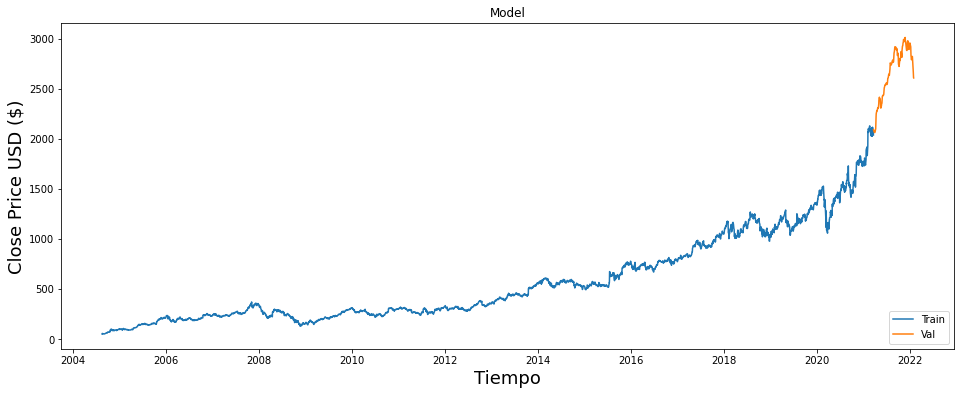

In [21]:
# Mostramos la grafica
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Tiempo', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


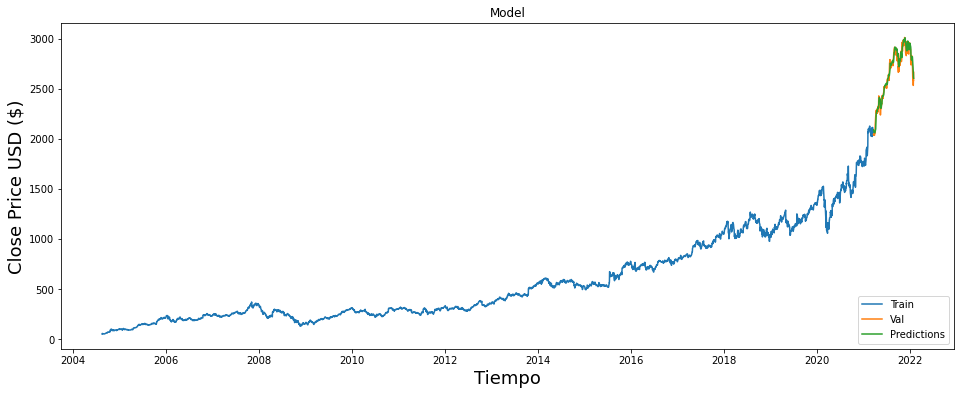

In [22]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Tiempo', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

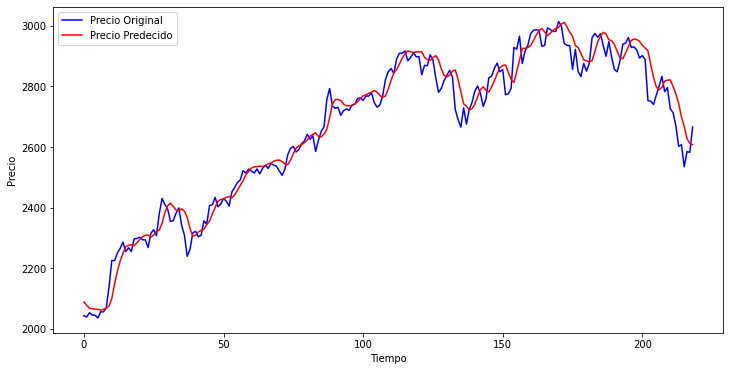

In [23]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Precio Original')
plt.plot(predictions, 'r', label= 'Precio Predecido')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend()
plt.show()

In [24]:
valid

,Close,Predictions
Date,,
2021-03-19,2043.199951,2088.865479
2021-03-22,2038.589966,2077.278076
2021-03-23,2052.959961,2067.742676
2021-03-24,2045.060059,2065.857666
2021-03-25,2044.359985,2064.702881
...,...,...
2022-01-24,2607.439941,2699.682373
2022-01-25,2534.709961,2667.548096
2022-01-26,2584.800049,2627.139404


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bec4fde9-3271-4973-9805-8dd1c303c5ca' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>